In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Part 1: More on the logistic map

Let $x_n\in[0,1]$ be the (normalised) population of some species at year $n$. Suppose the normalised population in year $n+1$ is given by $$x_{n+1}=rx_n(1-x_n)$$
with $0<r\leq 4$. It turns out that this simple looking model can generate very complicated behaviour.  We can begin to understand some of this behaviour using numerical simulations. 


## Sensitive Dependence 
When does the logisitc map exhibit **sensitive dependece on initial conditions**? We can explore this quesiton numerically by generating two initial conditions very close to each-other and iterating them forward. Fix $x_0\in [0,1]$ and a small $\epsilon>0$. Let $y_0=x_0+\epsilon$ and generate two sequences
\begin{align}
x_{n+1} = rx_n(1-x_n) \\
y_{n+1} = ry_n(1-y_n)
\end{align}
We then plot $d_n := \vert x_n-y_n\vert$. We have sensitive dependence on initial conditions if $d_n$ eventually becomes large for arbitrarily small $\epsilon>0$. 

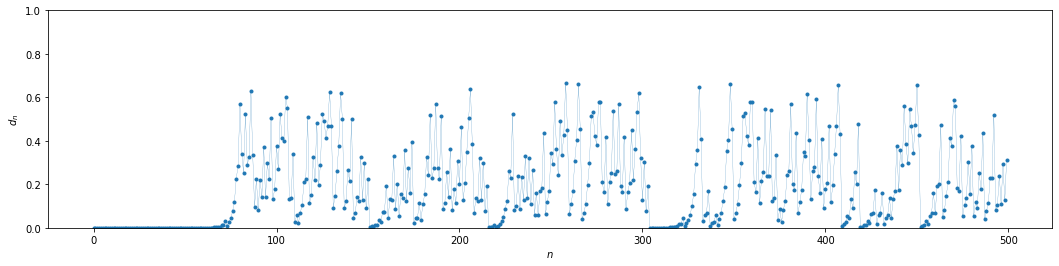

In [3]:
N = 500 # number of time-steps
x = np.zeros(N); y = np.zeros(N)
x[0] = np.random.uniform(0,1) # randomly distirbuted initial conditions
eps = 1e-14
y[0] = x[0] + eps

# Pick your parameter
r = 3.7

for i in range(N-1):
    x[i+1] = r*x[i]*(1-x[i]);
    y[i+1] = r*y[i]*(1-y[i])

plt.figure(figsize=(18,4))
plt.plot(np.abs(x-y), marker='.', linewidth=0.2); 
plt.ylabel('$d_n$'); plt.xlabel('$n$');
plt.ylim([0,1]);

### Periodic orbits
We have seen in the lectures that an abundance of periodic orbits is an important ingredient of chaos. Periodic orbits of order $n$ can be found by  solving the equation
\begin{equation}
x = f^n(x).
\end{equation}
The code below helps you visualise this.

**Question**: How does the number of periodic orbits of order $n$ scale with $n$?



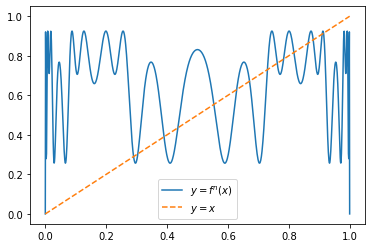

In [ ]:
# Define the function f^n(x) 
def f(n,x,r):
  for i in range(n):
    x = r*x*(1-x)
  return x

# Plot the graph of y=f^n(x) and y=x to see solutions 
x = np.linspace(0,1, num = 1001)
r = 3.7
n = 6
plt.plot(x,f(n,x,r), label = '$y=f^n(x)$')
plt.plot(x,x, linestyle='--', label = '$y=x$')
plt.legend();

## Part 2: $f(x) = 10x\, \mathrm{mod} 1$

We have to be careful when using computers (with finite precision) to study properties of maps which rely on arbitrarily small differences between numbers. This is shown in the following example.

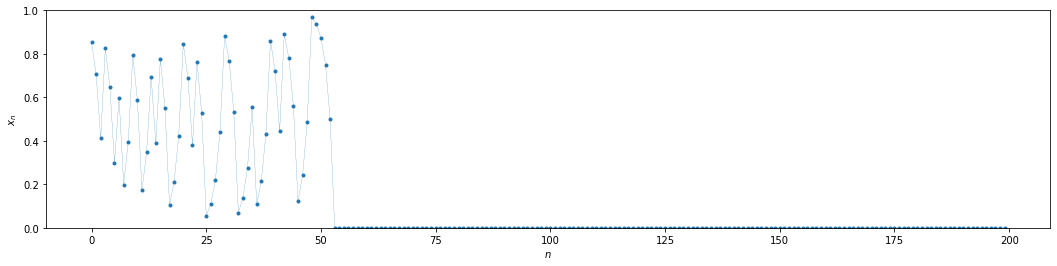

In [4]:
N = 200 # number of time-steps
x = np.zeros(N); 
x[0] = np.random.uniform(0,1) # pick initial condition x_0$

for i in range(N-1):
   x[i+1] = np.mod(2*x[i], 1) 

plt.figure(figsize=(18,4))
plt.plot(x, marker='.', linewidth=0.2);
plt.xlabel('$n$'); plt.ylabel('$x_n$'); plt.ylim([0,1]);

It seems from the numerics that all initial conditions converge to zero after 50 iterations. 

**Question**: Why is this happening? Think about the symbolic dynamics and which types of numbers the computer can store. 

# Part 3 : Finding a Markov partition for piecewise affine interval maps

Suppose we have a continuous pieceise affine interval map $f:[0,1]\rightarrow [0,1]$. The map can be described by a partition of $[0,1]$ given by 
\begin{equation}
0 = I_0 < I_1 < I_2 <\dots < I_{n-1} < I_n=1
\end{equation}
along with the values $f$ takes on the end points of the partitions
\begin{equation}
f(I_k)\in[0,1] \quad \text{ for } k=0,1,\dots, n.
\end{equation}
The map is then defined by linear interpolation 
\begin{equation}
f(x) = f(I_{k-1}) + m_k(x-I_{k-1})  \, \text{ for } x\in [I_{i-1},I_i]
\end{equation}
with 
\begin{equation}
m_k := \frac{f(I_k)-f(I_{k-1})}{I_k-I_{k-1}}
\end{equation}
**Question**: Is there a finite Markov partition for this map? If so, find it and compute its adjaceny matrix


(0.0, 1.0)

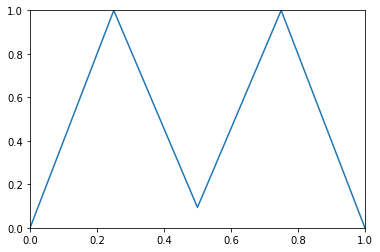

In [ ]:
# provide the data to construct the piecewise affine interval map
I = np.array([0, 0.25, 0.5, 0.75, 1])
fI = np.array([0, 1, 0.03125+0.0625, 1, 0])
m = np.diff(fI)/np.diff(I) # compute the slopes of the pieces
N = np.size(I) 

# define the map acting on numbers
def f(x, I=I, fI=fI):
  for i in range(N-1):
    if I[i] <= x <= I[i+1]:
      return fI[i] + m[i]*(x-I[i])

# define the map acting on numpy arrays (there's probably a better way of doing this)
def F(x):
  N = np.size(x); Fx = np.zeros(N)
  for i in range(N):
    Fx[i] = f(x[i])
  return Fx

# plot the map
x = np.linspace(0,1, 1001)
plt.plot(x, F(x));
plt.xlim([0,1]); plt.ylim([0,1])


**Challenge**: Write an algorithm which can output a finite Markov partition for this map (if it exists)

11


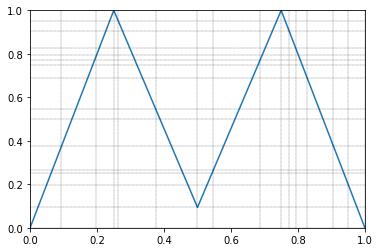

In [ ]:
eps = 1e-16 # tolerance for equality 
term  = 100 # recursion limit
stop = False 
K = 0
I1 = I # begin with partition upon which the map is defined
while (stop == False) and (K < term):
  FI = F(I1)
  I2 = I1
  for j in range(np.size(FI)):
    # refine partition by adding the image of the boundary points 
    if np.all(np.abs(FI[j]-I1)) > eps: 
        I2 = np.append(I2,FI[j])
  I2 = np.sort(I2)
  # stop if nothing has been added (meaning boundary points are invariant)
  if np.size(I1) == np.size(I2):
    stop = True
  else:
    I1 = I2; K = K+1
print(K)

# plot the markov partition if we've found it 
if K < term:
  x = np.linspace(0,1, 1001)
  plt.plot(x, F(x));
  for i in range(len(I1)):
    plt.axvline(x = I1[i], color = 'black', linestyle='--', linewidth = 0.25)
    plt.axhline(y = I1[i], color = 'black', linestyle='--', linewidth = 0.25)
  plt.xlim([0,1]); plt.ylim([0,1]);

## Part 4. Finding invariant measures with Perron-Frobenius Operators
Given an interval map $f:[0,1]\rightarrow[0,1]$ we can define an operator $L$ which acts on probability densities $p:[0,1]\rightarrow \mathbb{R}_{\geq 0}$. 

To define it we need some notation. For a probability density function $p$, we define the measure
\begin{equation}
\mu_p(A) := \int_A p(x)\, dx
\end{equation}
i.e. the measure associated with the density $p$. The Perron-Frobenius operator is then defined as
\begin{equation}
Lp := \frac{d}{dx} f_*\mu_p.
\end{equation}
where $\frac{d}{dx}$ denotes the Radon-Nikodym derivative with respect to the Lebesgue measure. In words, $Lp$ is the density of the push-forward of the measure associated with $p$. Clearly if $\mu_p$ is an invariant measure we have $Lp=p$. 

$L$ is an infinite dimensional operator. We can approximate it with a finite dimensional operator (matrix) as follows. First we chop the interval $[0,1]$ into $n$ sub-intervals 
\begin{equation}
0=x_0 < x_1 < \dots < x_{n-1} < x_n=1 
\end{equation}
and let $I_k=[x_{k-1},x_k]$. Now define an $n\times n$ matrix $\bar{L}$
\begin{equation}
\bar{L}_{ij} = \frac{\lambda(I_i\cap f^{-1}(I_j)}{\lambda(I_i)}
\end{equation}
the proportion (according to the Lebesgue measure) of points in $I_i$ which are mapped into $I_j$. $P$ is a stochastic matrix so the **Perron-Frobenius theorem** applies. Eigen-vectors for $\bar{L}$ with eigen-value 1 approximate invariant measures for $f$.

**Challenge**: Write an algorithm which approximats the matrix $\bar{L}$ and therefore find the approximate invariant measure for f?

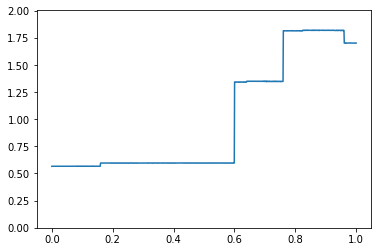

In [ ]:
import scipy.sparse.linalg as sc
n = 1000 # number of sub-intervals
K = 2000 # number of points in each sub-interval
M = n*K # total number of points
L = np.zeros((n,n))
x = np.zeros(M)

# apply map
x = np.linspace(0,1,M+1)
xL = np.linspace(0,1, n)
fx = F(x)

# convert points to the index of the sub-interval they belong to
xI=np.ceil(n*x)
fxI=np.ceil(n*fx)

# construct the matrix L
for i in range(M):
  L[int(xI[i])-1,int(fxI[i])-1]=L[int(xI[i])-1,int(fxI[i])-1]+1
L=L.T
L=L/np.sum(L,0)

# find the perron-frobenius eigen-vector of L
val, inv = sc.eigs(L, k=1, which='LM')

inv=np.abs(inv)
inv = (n/np.sum(inv))*inv
plt.plot(xL, inv);
plt.ylim([0, 1.1*np.max(inv)]);

## Part 5: Non-linear expanding circle maps
Consider a non-linear perturbation of the doubling map given by
\begin{equation}
f(x) = \left(2x + \frac{\sin(2\pi x)}{10}\right)\,\mathrm{mod} 1
\end{equation}

**Challenge**: We know that this map is semi-conjugate to the full shift on the sequence space $\Sigma_2^+$. Write a programme which constructs the semi-conjugacy map $h:\Sigma_+^2\rightarrow S^1$?

The map $h$ is defined by a sequence of partitions. We have seen in the piecewise affine case that this is the uniform partition. Below we construct the non-uniform sequence of partitions for this non-linear example.

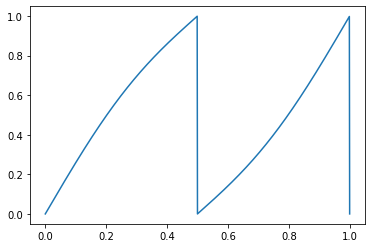

In [ ]:
# Define the circle map and plot it 
def f(x):
  return np.mod(2*x + np.sin(2*np.pi*x)/10, 1)
x = np.linspace(0, 1, 1001)
plt.plot(x, f(x))

# Define a function which returns the first n digits of a given point's
# symbolic representation
def pre_h(x, N):
  pre_hx = np.zeros(N)
  for i in range(N):
    pre_hx[i] = (x >= 0.5)*1
    x = f(x)
  return pre_hx

Given a Markov parition $X=I_1\cap I_2\cap\dots\cap I_N$ we can try to define the inverse conjugacy map $h^{-1}:S^1\rightarrow \Sigma^N_+$ given by
\begin{equation}
h^{-1}(x) = (M(x),\, M(f(x)),\, M(f^2(x)),\dots)
\end{equation}
where $M:S^1\rightarrow \{1,\dots, N\}$ is the map identifying a point in $S^1$ to the label of the partition element is belongs to. 

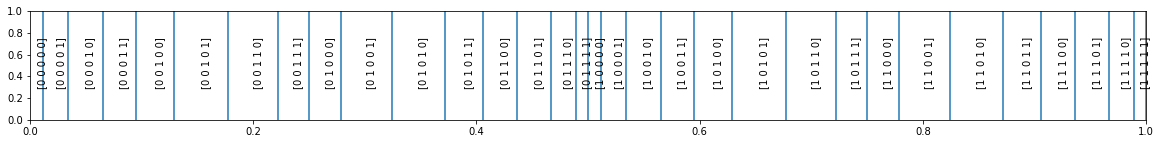

In [ ]:
K = 1001
N = 5
x = np.linspace(0,1, K)
part = []
# extract the boundary points of the order n partition 
for i in range(K-1):
  if np.any(pre_h(x[i], N) - pre_h(x[i+1], N) != 0):
    part = np.append(part, x[i+1])

# plot the order n partition 
plt.figure(figsize=(20,2))
for i in range(len(part)):
  plt.axvline(x = part[i])
  if i == 0:
    mid = part[i]/2
    pre_h_mid = pre_h(mid, N)
    plt.text(mid, 0.3, '%s' %pre_h_mid.astype(int), rotation = 90)
  else:
    mid = (part[i-1]+part[i])/2
    pre_h_mid = pre_h(mid, N)
    plt.text(mid, 0.3, '%s' %pre_h_mid.astype(int), rotation = 90)
